## Problem Statement  

You are given an integer $n$. Implement the operation of preparing the state $|\psi\rangle$ from the zero state on a quantum circuit $qc$ with $n$ qubits.  

The quantum state $|\psi\rangle$ is defined as:  

$$|\psi\rangle = \frac{1}{\sqrt{2}} (|0...0\rangle_n - |1...1\rangle_n).$$  

## Constraints  

- $2 \leq n \leq 15$  
- Global phase is ignored in judging.  
- The submitted code must follow the specified format.  

## Sample Input  

For $n = 4$, the implemented circuit $qc$ should perform the following transformation:  

$$|0000\rangle \rightarrow \frac{1}{\sqrt{2}} (|0000\rangle - |1111\rangle).$$  


In [12]:
from qiskit import QuantumCircuit


def solve(n: int) -> QuantumCircuit:
    qc = QuantumCircuit(n)
    qc.h(0)
    
    for i in range(1,n):
        qc.cx(control_qubit=0, target_qubit=i)
    qc.cz(control_qubit=0, target_qubit=1)

    return qc

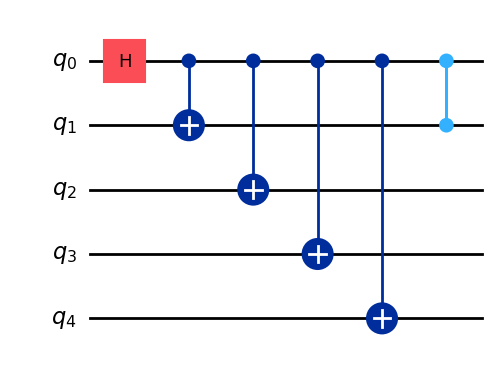

In [13]:
qc = solve(5)

qc.draw('mpl')

In [14]:
from qiskit.quantum_info import Statevector

statevector = Statevector(qc)

statevector.draw('latex')

<IPython.core.display.Latex object>

## Solution Approach  

To prepare the quantum state  

$$|\psi\rangle = \frac{1}{\sqrt{2}} (|0...0\rangle_n - |1...1\rangle_n),$$  

we follow these steps:  

1. **Initialize the qubits**: All qubits start in the $|0\rangle$ state.  
2. **Apply a Hadamard ($H$) gate on qubit 0**: This creates a superposition state:  

   $$\frac{1}{\sqrt{2}} (|0\rangle + |1\rangle) \otimes |0\rangle^{\otimes (n-1)}.$$  

3. **Apply CNOT ($CX$) gates from qubit 0 to all other qubits (1 to $n-1$)**: This entangles the qubits, transforming the state into:  

   $$\frac{1}{\sqrt{2}} (|00...0\rangle + |11...1\rangle).$$  

4. **Apply a controlled-Z ($CZ$) gate with qubit 0 as control and qubit 1 as target**: This introduces a phase flip on the $|11...1\rangle$ state, yielding the final desired state:  

   $$\frac{1}{\sqrt{2}} (|0...0\rangle - |1...1\rangle).$$  
